In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler

# Funções

In [19]:
def load_data(filepath):
    return pd.read_csv(filepath)

In [20]:
def excluir_colunas_vazias(df, limite=80):
    
    percentual_vazio = df.isnull().mean() * 100
    colunas_a_remover = percentual_vazio[percentual_vazio > limite].index
    df_sem_colunas_vazias = df.drop(columns=colunas_a_remover)
    
    if len(colunas_a_remover) > 0:
        print(f"Colunas removidas (com mais de {limite}% de dados vazios):")
        print(colunas_a_remover)
    
    return df_sem_colunas_vazias

In [21]:
def preencher_com_media(df):
   
    for coluna in df.columns:
        if pd.api.types.is_numeric_dtype(df[coluna]):
            media_coluna = df[coluna].mean()
            df[coluna].fillna(media_coluna, inplace=True)
            print(f"Preenchendo a coluna '{coluna}' com a média ({media_coluna})")
    return df

In [22]:
def feature_selection_nn(df, target_column, n_features=15):
    
    df = df.dropna()
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42, solver='adam', verbose=False)
    
    model.fit(X_train, y_train)
    
    feature_importance = np.abs(model.coefs_[0]).sum(axis=1)
    feature_indices = np.argsort(feature_importance)[::-1]
    
    selected_features = X.columns[feature_indices[:n_features]].tolist()
    
    print(f"As {n_features} features mais importantes: {selected_features}")
    
    return selected_features

In [23]:
import pandas as pd

def split_data_with_validation(df, test_size=0.2, validation_size=0.1, random_state=42):
    df_majority = df[df['CLASSE'] == 0]
    df_minority = df[df['CLASSE'] == 1]
    
  
    df_minority_test = df_minority.sample(frac=test_size, random_state=random_state)
    df_majority_test = df_majority.sample(n=df_minority_test.shape[0], random_state=random_state)
    test_df = pd.concat([df_majority_test, df_minority_test])
    
    df_majority_train = df_majority.drop(df_majority_test.index)
    df_minority_train = df_minority.drop(df_minority_test.index)
    
    df_minority_valid = df_minority_train.sample(frac=validation_size, random_state=random_state)
    df_majority_valid = df_majority_train.sample(n=df_minority_valid.shape[0], random_state=random_state)
    
    validation_df = pd.concat([df_majority_valid, df_minority_valid])
    
    df_majority_train = df_majority_train.drop(df_majority_valid.index)
    df_minority_train = df_minority_train.drop(df_minority_valid.index)
    
    train_df = pd.concat([df_majority_train, df_minority_train])
    
    return train_df, validation_df, test_df


In [24]:
import pandas as pd

def undersample_data(train_df):
    
    df_majority = train_df[train_df['CLASSE'] == 0]
    df_minority = train_df[train_df['CLASSE'] == 1]
    
    df_majority_undersampled = df_majority.sample(n=df_minority.shape[0], random_state=42)
    train_df_balanced = pd.concat([df_majority_undersampled, df_minority])
    train_df_balanced = train_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return train_df_balanced


# Usando as funções

In [25]:
if __name__ == "__main__": 
    import os
    filepath = r'C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\RECPAD\Processamento\df_processed'
    
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"O arquivo especificado não foi encontrado: {filepath}")
    
    df = load_data(filepath)

    df_processed = excluir_colunas_vazias(df, limite=80)

    selected_features = feature_selection_nn(df_processed, target_column='CLASSE', n_features=16)
    selected_features.append('CLASSE')

    df_selected = df_processed[selected_features]
    df_final = preencher_com_media(df_selected)

    train_df, validation_df, test_df = split_data_with_validation(df_final, test_size=0.2, validation_size=0.1, random_state=42)

    print("Atributos selecionados:", selected_features)
    print("Primeiras linhas do DataFrame final:\n", df_final.head())

Colunas removidas (com mais de 80% de dados vazios):
Index(['CODANOMAL', 'IDADEPAI'], dtype='object')
As 16 features mais importantes: ['MESPRENAT', 'CODMUNNASC', 'CONSPRENAT', 'IDADEMAE', 'CODMUNRES', 'CODESTAB', 'ESCMAE', 'PARIDADE', 'ESCMAE2010', 'CONSULTAS', 'DTULTMENST', 'ESCMAEAGR1', 'CODOCUPMAE', 'ESTCIVMAE', 'QTDPARTCES', 'SERIESCMAE']
Preenchendo a coluna 'MESPRENAT' com a média (4.640772220477387)
Preenchendo a coluna 'CODMUNNASC' com a média (261223.60452948158)
Preenchendo a coluna 'CONSPRENAT' com a média (8.579044997957393)
Preenchendo a coluna 'IDADEMAE' com a média (26.454007028104662)
Preenchendo a coluna 'CODMUNRES' com a média (260854.43317676536)
Preenchendo a coluna 'CODESTAB' com a média (2922956.306228404)
Preenchendo a coluna 'ESCMAE' com a média (3.9248829492692487)
Preenchendo a coluna 'PARIDADE' com a média (0.6269189595922768)
Preenchendo a coluna 'ESCMAE2010' com a média (2.908573634072315)
Preenchendo a coluna 'CONSULTAS' com a média (3.6753882528186756)
P

C:\Users\annab\AppData\Local\Temp\ipykernel_21904\2006828257.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(media_coluna, inplace=True)
C:\Users\annab\AppData\Local\Temp\ipykernel_21904\2006828257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].fillna(media_coluna, inplace=True)


Atributos selecionados: ['MESPRENAT', 'CODMUNNASC', 'CONSPRENAT', 'IDADEMAE', 'CODMUNRES', 'CODESTAB', 'ESCMAE', 'PARIDADE', 'ESCMAE2010', 'CONSULTAS', 'DTULTMENST', 'ESCMAEAGR1', 'CODOCUPMAE', 'ESTCIVMAE', 'QTDPARTCES', 'SERIESCMAE', 'CLASSE']
Primeiras linhas do DataFrame final:
    MESPRENAT  CODMUNNASC  CONSPRENAT  IDADEMAE  CODMUNRES   CODESTAB  ESCMAE  \
0        1.0      150140         8.0        37     260790  9046720.0     4.0   
1        3.0      230190         4.0        41     260530  2564211.0     5.0   
2        2.0      230190         8.0        33     260990  2564211.0     5.0   
3        1.0      230190         5.0        35     260630  2564211.0     5.0   
4        2.0      230420         6.0        17     261430  2415488.0     4.0   

   PARIDADE  ESCMAE2010  CONSULTAS    DTULTMENST  ESCMAEAGR1     CODOCUPMAE  \
0         0         3.0        4.0  1.606202e+07         6.0  999992.000000   
1         1         5.0        3.0  1.566402e+07         8.0  726313.335395   

In [26]:
train_df_balanced = undersample_data(train_df)

In [27]:
print(f"Tamanho do conjunto de treino: {train_df_balanced.shape}")
print(f"Tamanho do conjunto de validação: {validation_df.shape}")
print(f"Tamanho do conjunto de teste: {test_df.shape}")

Tamanho do conjunto de treino: (82062, 17)
Tamanho do conjunto de validação: (9118, 17)
Tamanho do conjunto de teste: (22794, 17)


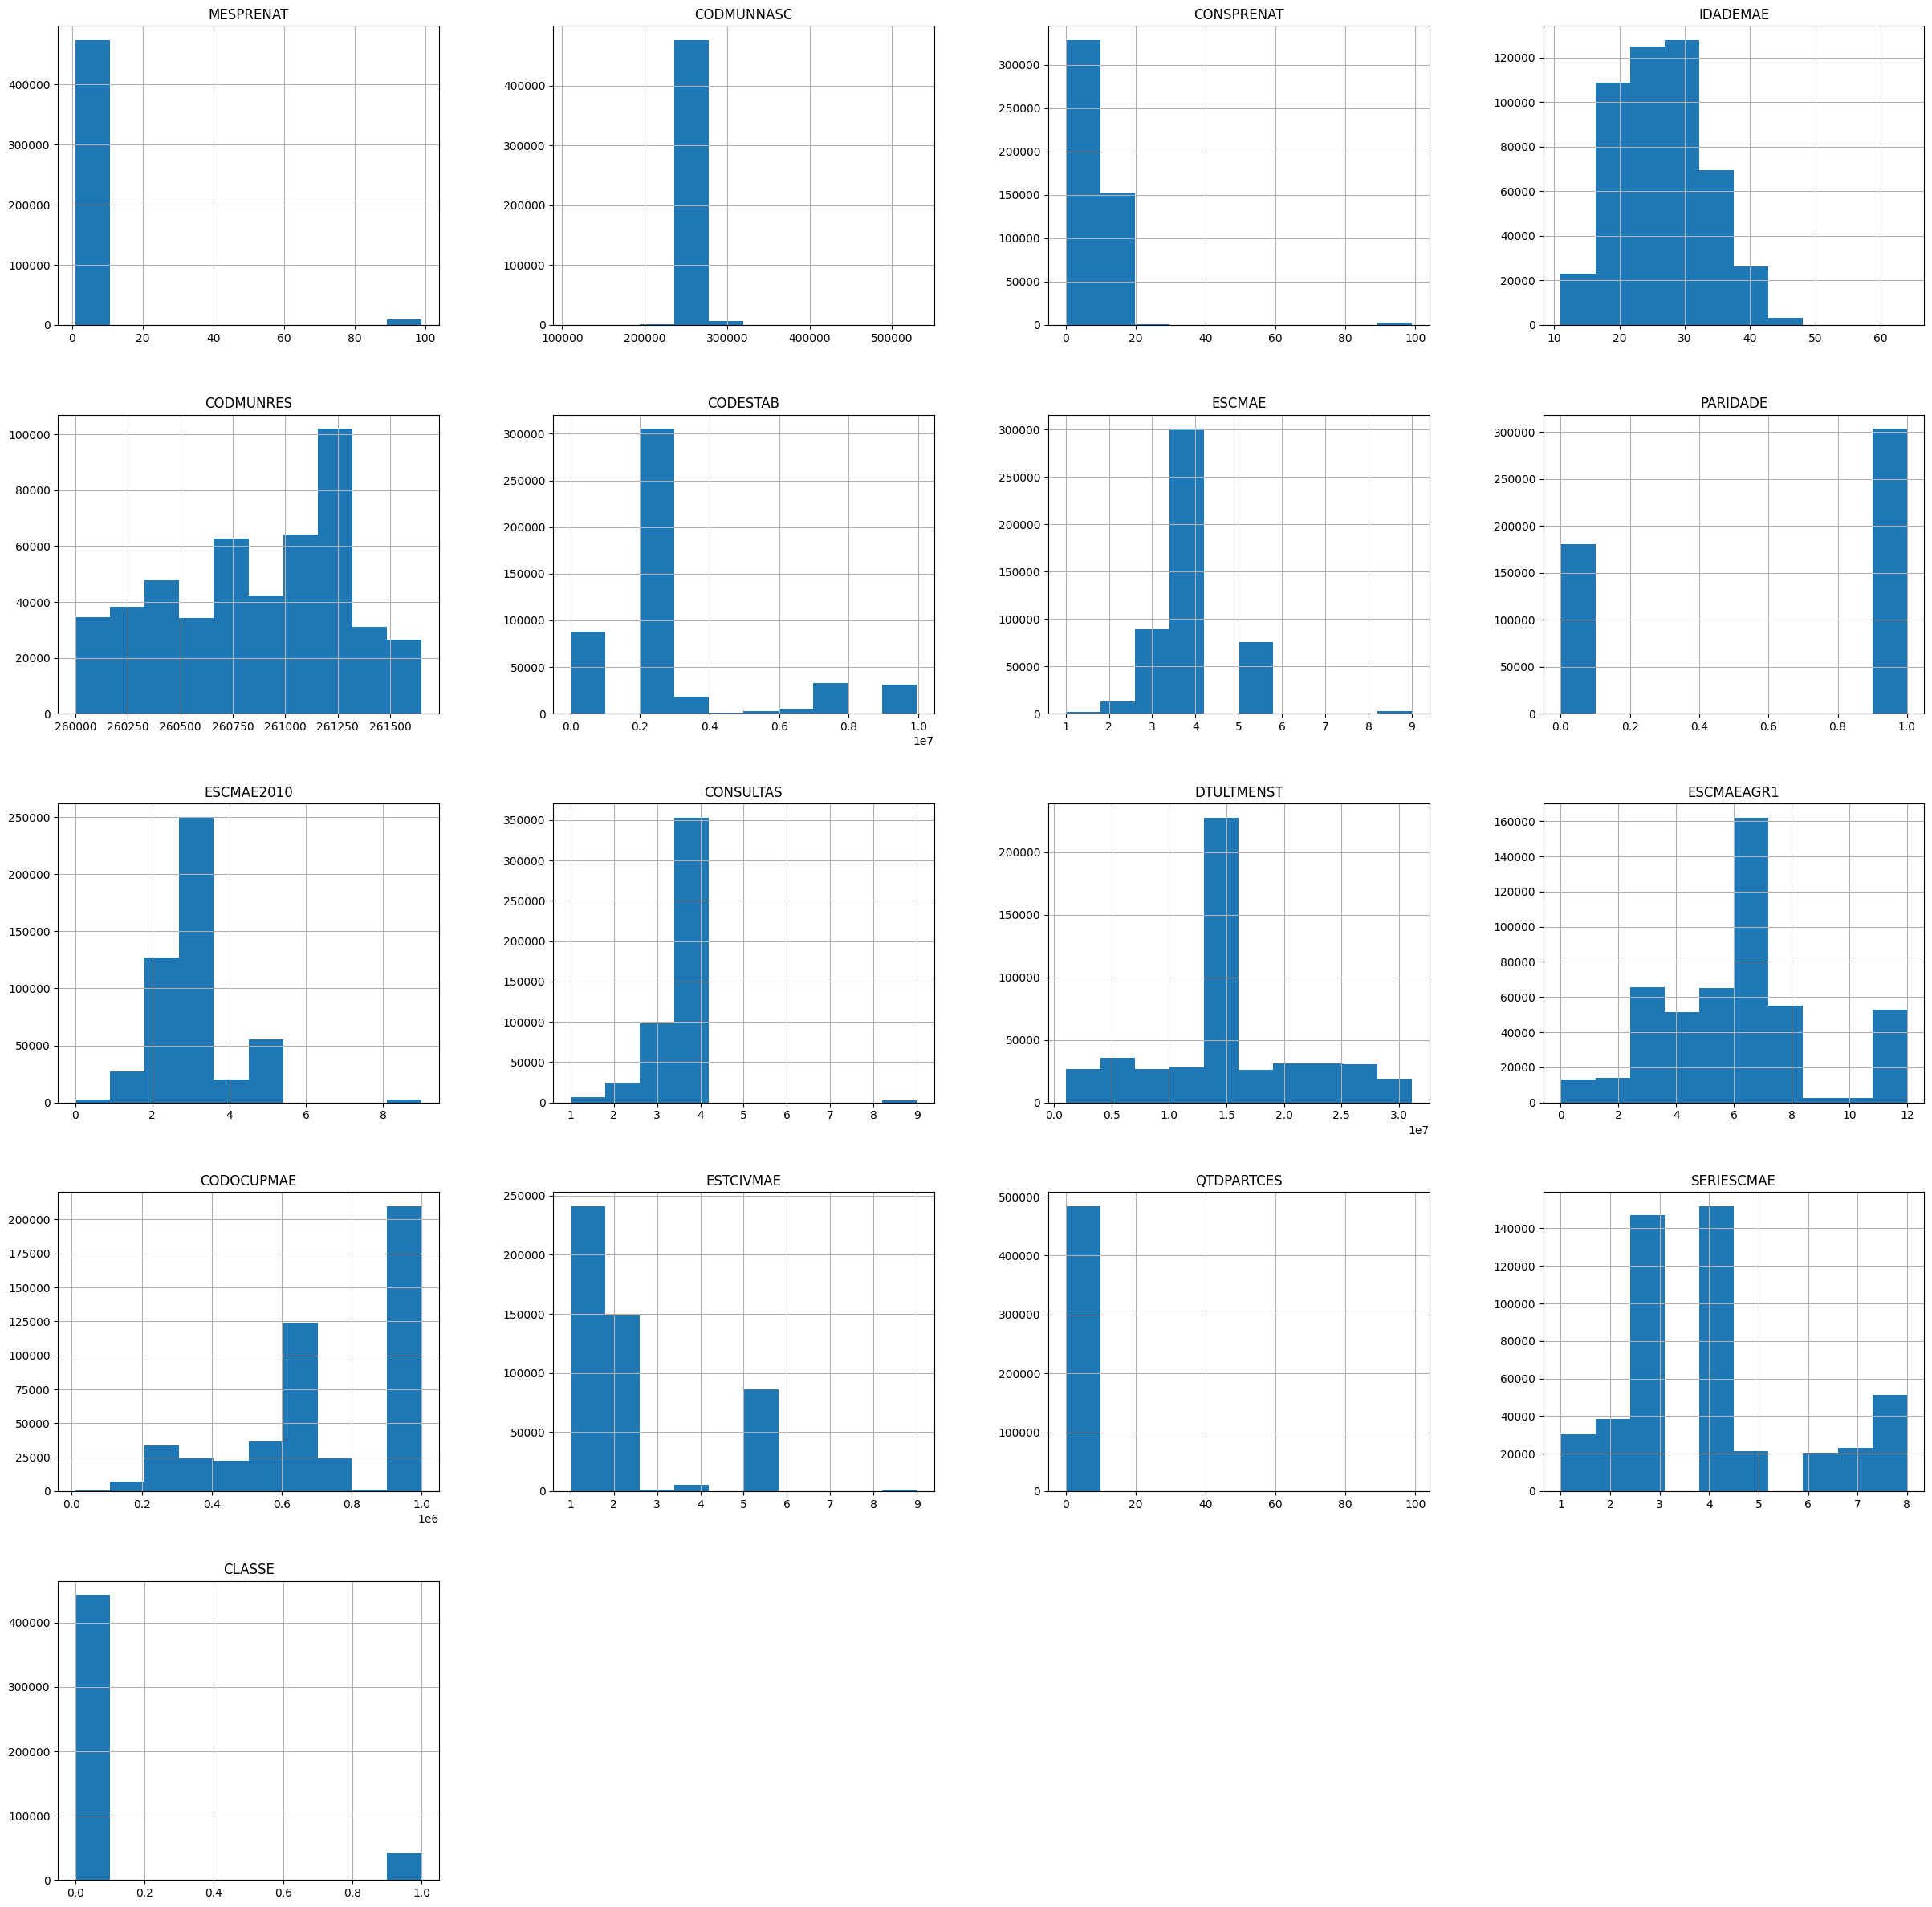

In [28]:
train_df.hist(figsize=(30,30))
plt.show()

# Modelos

## Decision Tree

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.67      0.68      0.67     11397
           1       0.68      0.66      0.67     11397

    accuracy                           0.67     22794
   macro avg       0.67      0.67      0.67     22794
weighted avg       0.67      0.67      0.67     22794



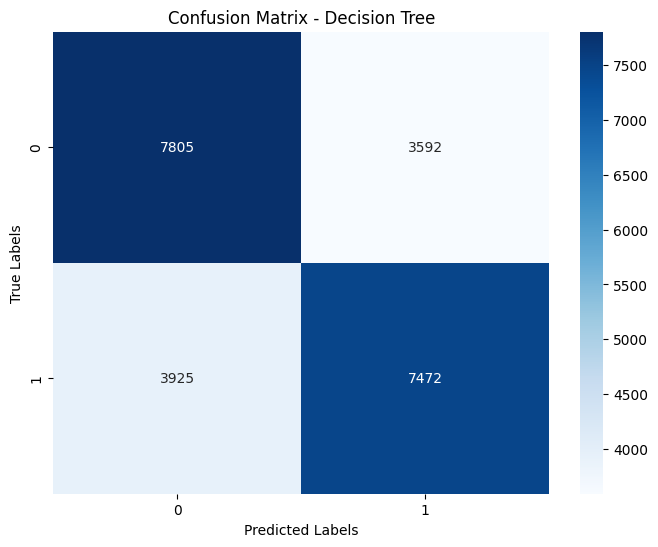

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

param_grid_dt = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 10]
  }

dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train_balanced, y_train_balanced)
best_params_dt = grid_search_dt.best_params_
print("Melhores parâmetros encontrados:", best_params_dt)

best_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)
best_dt_model.fit(X_train_balanced, y_train_balanced)

y_pred_dt = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues",
                xticklabels=best_dt_model.classes_,
                yticklabels=best_dt_model.classes_,
                cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Melhor Threshold Calculado: 0.0000
Melhor Recall Correspondente: 1.0000
Precisão Correspondente: 0.5000


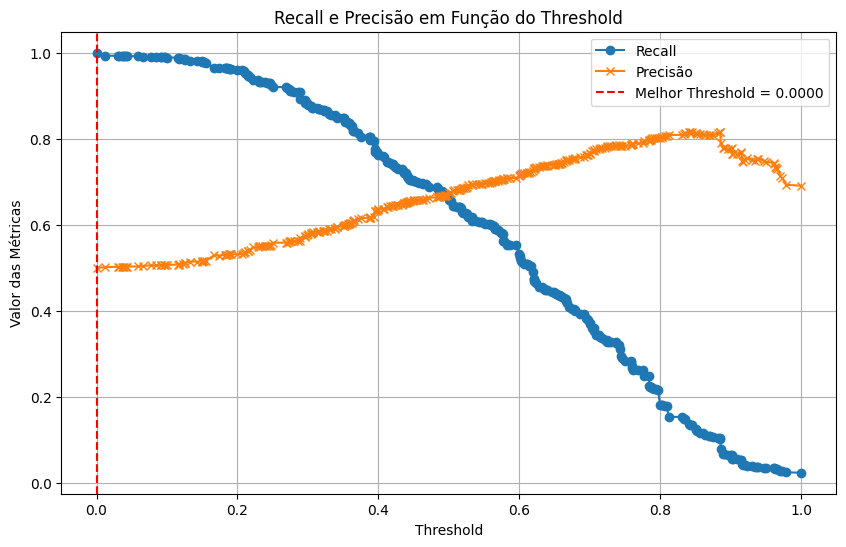

In [30]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

unique_thresholds = np.sort(np.unique(y_prob_dt))

precisions = []
recalls = []

for threshold in unique_thresholds:
    y_pred_threshold = (y_prob_dt >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)

best_threshold_index = np.argmax(recalls)
best_threshold = unique_thresholds[best_threshold_index]
best_recall = recalls[best_threshold_index]
best_precision = precisions[best_threshold_index]

print(f"Melhor Threshold Calculado: {best_threshold:.4f}")
print(f"Melhor Recall Correspondente: {best_recall:.4f}")
print(f"Precisão Correspondente: {best_precision:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(unique_thresholds, recalls, label='Recall', marker='o')
plt.plot(unique_thresholds, precisions, label='Precisão', marker='x')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Melhor Threshold = {best_threshold:.4f}")
plt.xlabel('Threshold')
plt.ylabel('Valor das Métricas')
plt.title('Recall e Precisão em Função do Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

threshold = 0.37
y_pred_threshold = (y_prob_dt >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
correctly_classified = accuracy * len(y_test)

print(f"Threshold Utilizado: {threshold:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (PPV): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR (Taxa de Falsos Positivos): {fpr:.4f}")
print(f"Classificados Corretamente: {correctly_classified:.0f} de {len(y_test)}")

thresholds_f1 = np.sort(np.unique(y_prob_dt))
f1_scores = []

for t in thresholds_f1:
    y_pred_dt = (y_prob_dt >= t).astype(int)
    f1 = f1_score(y_test, y_pred_dt)
    f1_scores.append(f1)

Threshold Utilizado: 0.3700
Acurácia: 0.6499
Precisão (PPV): 0.6129
Recall (Sensibilidade): 0.8136
F1-Score: 0.6992
Especificidade: 0.4862
PPV: 0.6129
NPV: 0.7229
FPR (Taxa de Falsos Positivos): 0.5138
Classificados Corretamente: 14814 de 22794


# Random Forest

Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     11397
           1       0.68      0.65      0.67     11397

    accuracy                           0.67     22794
   macro avg       0.67      0.67      0.67     22794
weighted avg       0.67      0.67      0.67     22794



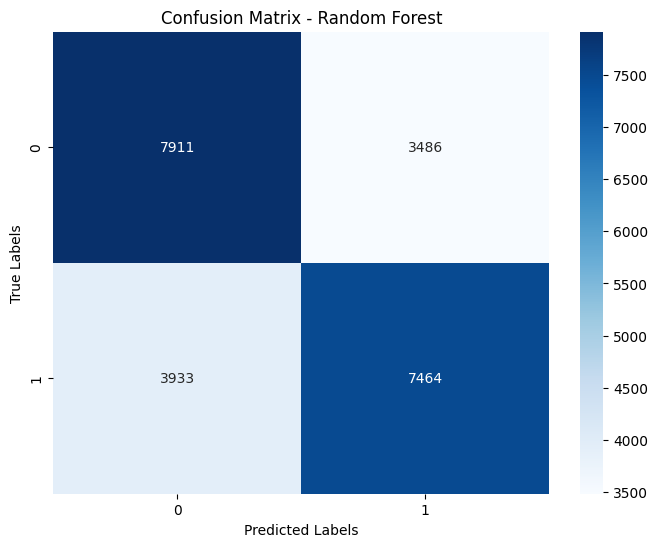

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']

undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

param_grid_rf = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_balanced, y_train_balanced)

best_params_rf = grid_search_rf.best_params_
print("Melhores parâmetros encontrados:", best_params_rf)

best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_model.fit(X_train_balanced, y_train_balanced)

y_pred_rf = best_rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues",
            xticklabels=best_rf_model.classes_,
            yticklabels=best_rf_model.classes_,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Melhor Threshold Calculado: 0.1068
Melhor Recall Correspondente: 1.0000
Precisão Correspondente: 0.5000


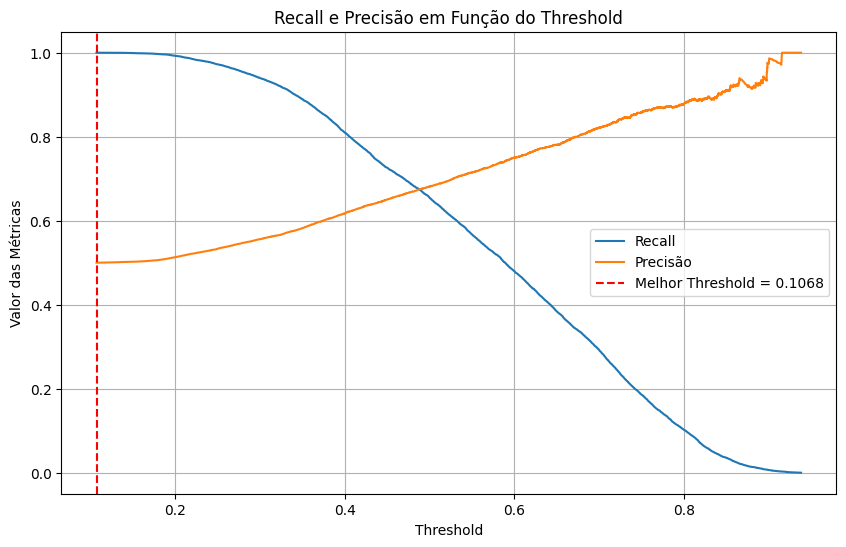

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11397
           1       0.50      1.00      0.67     11397

    accuracy                           0.50     22794
   macro avg       0.25      0.50      0.33     22794
weighted avg       0.25      0.50      0.33     22794



c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [33]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

unique_thresholds = np.sort(np.unique(y_prob_rf))

precisions = []
recalls = []

for threshold in unique_thresholds:
    y_pred_threshold = (y_prob_rf >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)

best_threshold_index = np.argmax(recalls)
best_threshold = unique_thresholds[best_threshold_index]
best_recall = recalls[best_threshold_index]
best_precision = precisions[best_threshold_index]

print(f"Melhor Threshold Calculado: {best_threshold:.4f}")
print(f"Melhor Recall Correspondente: {best_recall:.4f}")
print(f"Precisão Correspondente: {best_precision:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(unique_thresholds, recalls, label='Recall')
plt.plot(unique_thresholds, precisions, label='Precisão')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Melhor Threshold = {best_threshold:.4f}")
plt.xlabel('Threshold')
plt.ylabel('Valor das Métricas')
plt.title('Recall e Precisão em Função do Threshold')
plt.legend()
plt.grid(True)
plt.show()

y_pred_rf_threshold = (y_prob_rf >= best_threshold).astype(int)

print("Relatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf_threshold))

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_pred_rf = best_rf_model.predict_proba(X_test)[:, 1]

threshold = 0.08
y_pred_threshold = (y_pred_rf >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
correctly_classified = accuracy * len(y_test)

print(f"Threshold Utilizado: {threshold:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (PPV): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR (Taxa de Falsos Positivos): {fpr:.4f}")
print(f"Classificados Corretamente: {correctly_classified:.0f} de {len(y_test)}")

thresholds_f1 = np.sort(np.unique(y_pred_rf))
f1_scores = []

for t in thresholds_f1:
    y_pred_rf = (y_pred_rf >= t).astype(int)
    f1 = f1_score(y_test, y_pred_rf)
    f1_scores.append(f1)

Threshold Utilizado: 0.0800
Acurácia: 0.5000
Precisão (PPV): 0.5000
Recall (Sensibilidade): 1.0000
F1-Score: 0.6667
Especificidade: 0.0000
PPV: 0.5000
NPV: 0.0000
FPR (Taxa de Falsos Positivos): 1.0000
Classificados Corretamente: 11397 de 22794


# Gradient Boosting

c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros encontrados: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.68      0.71      0.70     11397
           1       0.70      0.67      0.68     11397

    accuracy                           0.69     22794
   macro avg       0.69      0.69      0.69     22794
weighted avg       0.69      0.69      0.69     22794



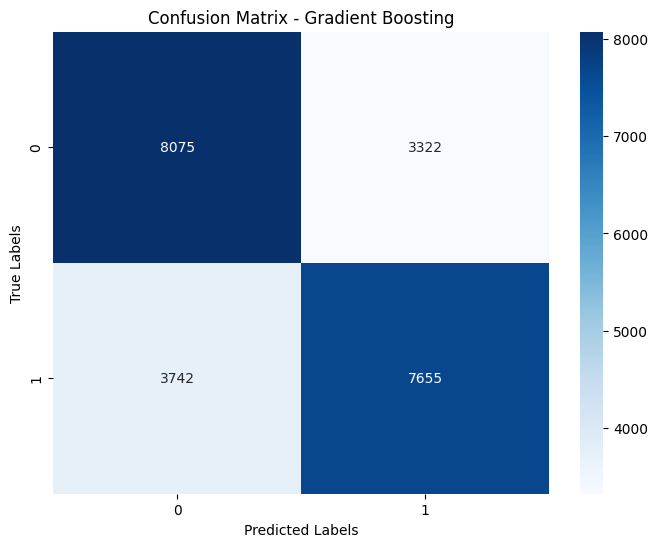

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']

undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

param_grid_gb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]  
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_gb.fit(X_train_balanced, y_train_balanced)

best_params_gb = grid_search_gb.best_params_
print("Melhores parâmetros encontrados:", best_params_gb)

best_gb_model = GradientBoostingClassifier(random_state=42, **best_params_gb)
best_gb_model.fit(X_train_balanced, y_train_balanced)

y_pred_gb = best_gb_model.predict(X_test)

print(classification_report(y_test, y_pred_gb))
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap="Blues",
            xticklabels=best_gb_model.classes_,
            yticklabels=best_gb_model.classes_,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


Melhor Threshold Calculado: 0.0577
Melhor Recall Correspondente: 1.0000
Precisão Correspondente: 0.5000


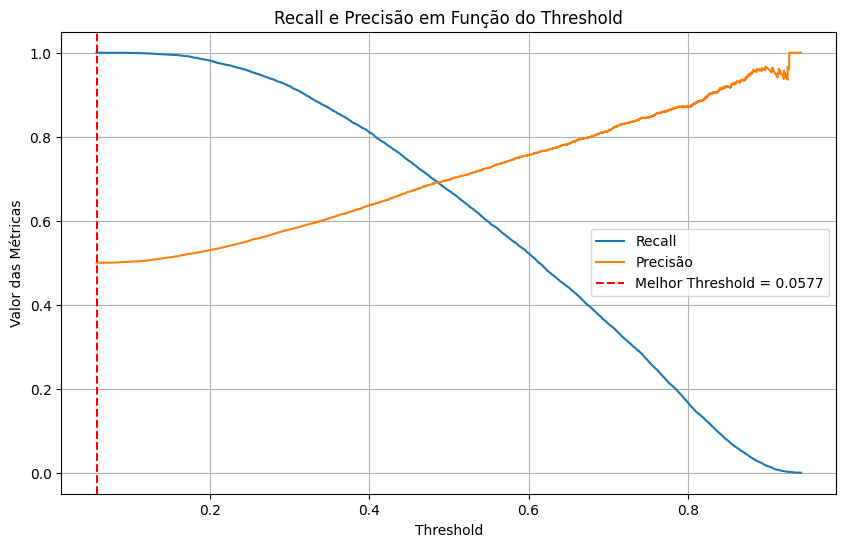

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11397
           1       0.50      1.00      0.67     11397

    accuracy                           0.50     22794
   macro avg       0.25      0.50      0.33     22794
weighted avg       0.25      0.50      0.33     22794



c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

y_pred_gb = best_gb_model.predict_proba(X_test)[:, 1]

unique_thresholds = np.sort(np.unique(y_pred_gb))

precisions = []
recalls = []

for threshold in unique_thresholds:
    y_pred_threshold = (y_pred_gb >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)

best_threshold_index = np.argmax(recalls)
best_threshold = unique_thresholds[best_threshold_index]
best_recall = recalls[best_threshold_index]
best_precision = precisions[best_threshold_index]

print(f"Melhor Threshold Calculado: {best_threshold:.4f}")
print(f"Melhor Recall Correspondente: {best_recall:.4f}")
print(f"Precisão Correspondente: {best_precision:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(unique_thresholds, recalls, label='Recall')
plt.plot(unique_thresholds, precisions, label='Precisão')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Melhor Threshold = {best_threshold:.4f}")
plt.xlabel('Threshold')
plt.ylabel('Valor das Métricas')
plt.title('Recall e Precisão em Função do Threshold')
plt.legend()
plt.grid(True)
plt.show()

y_pred_gb_threshold = (y_pred_gb >= best_threshold).astype(int)

print("Relatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_gb_threshold))

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_pred_gb = best_gb_model.predict_proba(X_test)[:, 1]

threshold = 0.33
y_pred_threshold = (y_pred_gb >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
correctly_classified = accuracy * len(y_test)

print(f"Threshold Utilizado: {threshold:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (PPV): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR (Taxa de Falsos Positivos): {fpr:.4f}")
print(f"Classificados Corretamente: {correctly_classified:.0f} de {len(y_test)}")

thresholds_f1 = np.sort(np.unique(y_pred_gb))
f1_scores = []

for t in thresholds_f1:
    y_pred_gb = (y_pred_gb >= t).astype(int)
    f1 = f1_score(y_test, y_pred_gb)
    f1_scores.append(f1)

Threshold Utilizado: 0.3300
Acurácia: 0.6411
Precisão (PPV): 0.5944
Recall (Sensibilidade): 0.8883
F1-Score: 0.7123
Especificidade: 0.3940
PPV: 0.5944
NPV: 0.7791
FPR (Taxa de Falsos Positivos): 0.6060
Classificados Corretamente: 14614 de 22794


# ___________________________________________________________

# Usando as funções para RN

In [38]:
if __name__ == "__main__":
    filepath = r'C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\RECPAD\Processamento\df_processed'
    
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"O arquivo especificado não foi encontrado: {filepath}")
    
    df = load_data(filepath)

    df_final_RN = excluir_colunas_vazias(df, limite=80)

    #selected_features = feature_selection_nn(df_processed, n_features=16)
    #df_selected = df_processed[selected_features]
    df_final_RN = preencher_com_media(df_selected)

    train_df, validation_df, test_df = split_data_with_validation(df_final_RN, test_size=0.2, validation_size=0.1, random_state=42)

    print("Atributos selecionados:", selected_features)
    print("Primeiras linhas do DataFrame final:\n", df_final.head())
    print(f"Tamanho do conjunto de treino: {train_df.shape}")
    print(f"Tamanho do conjunto de validação: {validation_df.shape}")
    print(f"Tamanho do conjunto de teste: {test_df.shape}")

Colunas removidas (com mais de 80% de dados vazios):
Index(['CODANOMAL', 'IDADEPAI'], dtype='object')
Preenchendo a coluna 'MESPRENAT' com a média (4.640772220477389)
Preenchendo a coluna 'CODMUNNASC' com a média (261223.60452948158)
Preenchendo a coluna 'CONSPRENAT' com a média (8.579044997957391)
Preenchendo a coluna 'IDADEMAE' com a média (26.454007028104662)
Preenchendo a coluna 'CODMUNRES' com a média (260854.43317676536)
Preenchendo a coluna 'CODESTAB' com a média (2922956.3062284044)
Preenchendo a coluna 'ESCMAE' com a média (3.9248829492692496)
Preenchendo a coluna 'PARIDADE' com a média (0.6269189595922768)
Preenchendo a coluna 'ESCMAE2010' com a média (2.9085736340723147)
Preenchendo a coluna 'CONSULTAS' com a média (3.675388252818676)
Preenchendo a coluna 'DTULTMENST' com a média (15664020.507253472)
Preenchendo a coluna 'ESCMAEAGR1' com a média (5.928762599828847)
Preenchendo a coluna 'CODOCUPMAE' com a média (726313.335394692)
Preenchendo a coluna 'ESTCIVMAE' com a média (

C:\Users\annab\AppData\Local\Temp\ipykernel_21904\2006828257.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(media_coluna, inplace=True)
C:\Users\annab\AppData\Local\Temp\ipykernel_21904\2006828257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].fillna(media_coluna, inplace=True)


Atributos selecionados: ['MESPRENAT', 'CODMUNNASC', 'CONSPRENAT', 'IDADEMAE', 'CODMUNRES', 'CODESTAB', 'ESCMAE', 'PARIDADE', 'ESCMAE2010', 'CONSULTAS', 'DTULTMENST', 'ESCMAEAGR1', 'CODOCUPMAE', 'ESTCIVMAE', 'QTDPARTCES', 'SERIESCMAE', 'CLASSE']
Primeiras linhas do DataFrame final:
    MESPRENAT  CODMUNNASC  CONSPRENAT  IDADEMAE  CODMUNRES   CODESTAB  ESCMAE  \
0        1.0      150140         8.0        37     260790  9046720.0     4.0   
1        3.0      230190         4.0        41     260530  2564211.0     5.0   
2        2.0      230190         8.0        33     260990  2564211.0     5.0   
3        1.0      230190         5.0        35     260630  2564211.0     5.0   
4        2.0      230420         6.0        17     261430  2415488.0     4.0   

   PARIDADE  ESCMAE2010  CONSULTAS    DTULTMENST  ESCMAEAGR1     CODOCUPMAE  \
0         0         3.0        4.0  1.606202e+07         6.0  999992.000000   
1         1         5.0        3.0  1.566402e+07         8.0  726313.335395   

In [39]:
train_df_balanced_RNN = undersample_data(train_df)

In [40]:
print(f"Tamanho do conjunto de treino: {train_df_balanced.shape}")
print(f"Tamanho do conjunto de validação: {validation_df.shape}")
print(f"Tamanho do conjunto de teste: {test_df.shape}")

Tamanho do conjunto de treino: (82062, 17)
Tamanho do conjunto de validação: (9118, 17)
Tamanho do conjunto de teste: (22794, 17)


# Modelos RN

# RNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier  # Usando scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Separando variáveis independentes e dependentes
X_train = train_df_balanced.drop(columns=['CLASSE'])
y_train = train_df_balanced['CLASSE']
X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

# Redimensionando os dados para 3 dimensões (adicionando uma dimensão temporal fictícia)
X_train = np.expand_dims(X_train, axis=1)  # Forma (n_samples, 1, n_features)
X_test = np.expand_dims(X_test, axis=1)    # Forma (n_samples, 1, n_features)

# Função para criar o modelo RNN
def create_rnn_model(input_dim, units=50, dropout_rate=0.2, activation='relu'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, input_dim), activation=activation, return_sequences=False))  # Camada LSTM
    model.add(Dropout(dropout_rate))  # Regularização
    model.add(Dense(100, activation=activation))  # Camada Dense para aprendizagem adicional
    model.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Definindo o KerasClassifier com os parâmetros iniciais
model_rnn = KerasClassifier(model=create_rnn_model, input_dim=X_train.shape[2], epochs=10, batch_size=32, verbose=0)

# Definindo os parâmetros para o GridSearch
param_grid_rnn = {
    'model__units': [50, 100, 200],
    'model__dropout_rate': [0.2, 0.4],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Configurando o GridSearchCV
grid_search_rnn = GridSearchCV(estimator=model_rnn, param_grid=param_grid_rnn, cv=3, n_jobs=-1, scoring='accuracy')

# Treinando com GridSearchCV
grid_search_rnn.fit(X_train, y_train)
best_params_rnn = grid_search_rnn.best_params_
print("Melhores parâmetros encontrados:", best_params_rnn)

# Obtendo o melhor modelo e avaliando no conjunto de teste
best_rnn_model = grid_search_rnn.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)

# Relatório de classificação
print(classification_report(y_test, y_pred_rnn))

# Matriz de confusão
conf_matrix_rnn = confusion_matrix(y_test, y_pred_rnn)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap="Blues",
            xticklabels=best_rnn_model.classes_,
            yticklabels=best_rnn_model.classes_,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RNN')
plt.show()
